### Data import, cleaning, visualization
#### Intro to ML workshop: 2018-08-18

In [1]:
# Import libraries

# Data exploration
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt

# The % signifies a ipynb "magic function". This line allows the figure to be rendered in the notebook next to the
# code. 
%matplotlib inline

In [2]:
# What versions are you running?
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

Pandas version: 0.19.2
Numpy version: 1.11.3


In [3]:
# Read in the data. Remember to pass in the full file path!
training_dataset_path = '../data/commute-times-train.csv'
testing_dataset_path = '../data/commute-times-test.csv'
train_data_raw = pd.read_csv(training_dataset_path, parse_dates=['time_of_day_ts'])
test_data_raw = pd.read_csv(testing_dataset_path, parse_dates=['time_of_day_ts'])

### Quick primer to viewing data

In [4]:
# How to quickly access docstring on syntax
?pd.DataFrame.head()

In [6]:
# Read in the first five rows of data.
train_data_raw.head()

,Unnamed: 0,source_latitude,source_longitude,destination_latitude,destination_longitude,time_of_day_ts,commute_type,commute_time
0,0,-0.182809,0.361579,0.485623,0.300347,2018-08-13 16:56:00,BUS,25.156297
1,1,0.160297,0.064330,0.702545,-0.116307,2018-08-13 18:19:00,CAR,12.937429
2,2,0.762229,0.486693,0.197252,0.790051,2018-08-13 17:36:00,BIKE,29.013729
3,3,0.187947,0.508487,-0.372924,-0.914006,2018-08-13 07:41:00,CAR,18.215423
4,4,-0.431013,-0.600620,0.729273,0.215633,2018-08-13 15:56:00,TRAIN,11.196802


In [7]:
# Other options include using .tail() and .sample(). You can specify how many rows of data to see. The default is 5. 
train_data_raw.sample(3)

,Unnamed: 0,source_latitude,source_longitude,destination_latitude,destination_longitude,time_of_day_ts,commute_type,commute_time
15777,15777,-0.170371,-0.238905,0.692891,-0.709350,2018-08-13 18:00:00,BIKE,30.307418
15495,15495,0.645105,-0.407795,-0.835608,-0.351124,2018-08-13 10:43:00,CAR,12.704825
6043,6043,0.120285,0.773417,-0.002222,0.129175,2018-08-13 07:57:00,BUS,27.245675


In [8]:
# Other methods to use to get some information about your dataset. By default, using .describe() provides some summary
# statistics of what kind of data?
train_data_raw.describe()

,Unnamed: 0,source_latitude,source_longitude,destination_latitude,destination_longitude,commute_time
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,9999.500000,-0.002115,0.001366,0.004656,-0.002148,19.742193
std,5773.647028,0.494554,0.501270,0.498530,0.498508,8.234790
min,0.000000,-0.996771,-0.997894,-0.998336,-0.997937,0.353436
25%,4999.750000,-0.394784,-0.404452,-0.397990,-0.402976,13.298351
50%,9999.500000,-0.002029,0.003488,0.007838,-0.001741,18.741689
75%,14999.250000,0.392261,0.406670,0.405283,0.398388,25.434019
max,19999.000000,0.999195,0.998077,0.997996,0.997447,49.819117


In [9]:
# In case it is of interest, there are kwargs that will provide additional information.
train_data_raw.describe(include='all')

,Unnamed: 0,source_latitude,source_longitude,destination_latitude,destination_longitude,time_of_day_ts,commute_type,commute_time
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000,20000,20000.000000
unique,NaN,NaN,NaN,NaN,NaN,1356,5,NaN
top,NaN,NaN,NaN,NaN,NaN,2018-08-13 08:07:00,CAR,NaN
freq,NaN,NaN,NaN,NaN,NaN,70,6995,NaN
first,NaN,NaN,NaN,NaN,NaN,2018-08-13 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2018-08-13 23:59:00,NaN,NaN
mean,9999.500000,-0.002115,0.001366,0.004656,-0.002148,NaN,NaN,19.742193
std,5773.647028,0.494554,0.501270,0.498530,0.498508,NaN,NaN,8.234790
min,0.000000,-0.996771,-0.997894,-0.998336,-0.997937,NaN,NaN,0.353436
25%,4999.750000,-0.394784,-0.404452,-0.397990,-0.402976,NaN,NaN,13.298351


In [10]:
# There is a quick way to learn what size dataset you are working with. .shape will return (rows, columns).
train_data_raw.shape

(20000, 8)

In [11]:
# It's important to know what data types are in your dataset! It's not usually a good idea to make assumptions about 
# the data you are working with. 
train_data_raw.dtypes

Unnamed: 0                        int64
source_latitude                 float64
source_longitude                float64
destination_latitude            float64
destination_longitude           float64
time_of_day_ts           datetime64[ns]
commute_type                     object
commute_time                    float64
dtype: object

### np.NaN != [None, 0] 
### NaN is very useful because you can leverage vectorized operations in numpy. The data type for each of those values (NaN, None, 0) is different. Think about this when you consider how to impute or otherwise handle missing data.

In [13]:
# Is there any missing data in this dataset?
train_data_raw.isnull().values.any()

False

In [14]:
# If there are NaNs, how many are present in each column?
train_data_raw.isnull().sum()

Unnamed: 0               0
source_latitude          0
source_longitude         0
destination_latitude     0
destination_longitude    0
time_of_day_ts           0
commute_type             0
commute_time             0
dtype: int64

### Let's continue learning about the data through visualizations

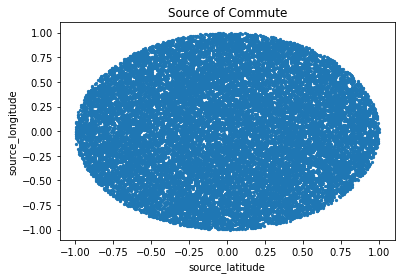

In [15]:
# Can we discern any information from lat long?
train_data_raw.plot.scatter(x='source_latitude', y='source_longitude', marker='.')
plt.title('Source of Commute');

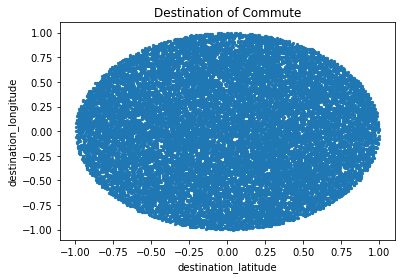

In [17]:
train_data_raw.plot.scatter(x='destination_latitude', y='destination_longitude', marker='.')
plt.title('Destination of Commute');

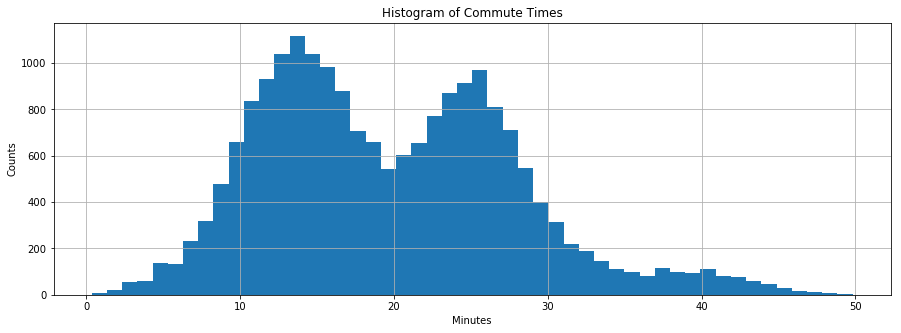

In [18]:
# This will show the distribution of commute times.
plt.figure(figsize=(15,5))
train_data_raw['commute_time'].hist(bins=50)
plt.title('Histogram of Commute Times')
plt.xlabel('Minutes')
plt.ylabel('Counts');

In [24]:
# This is a nice summary table, but let's graph this out somehow.
train_data_raw.groupby('commute_type').size()

commute_type
BIKE     3008
BUS      6453
CAR      6995
TRAIN    2498
WALK     1046
dtype: int64

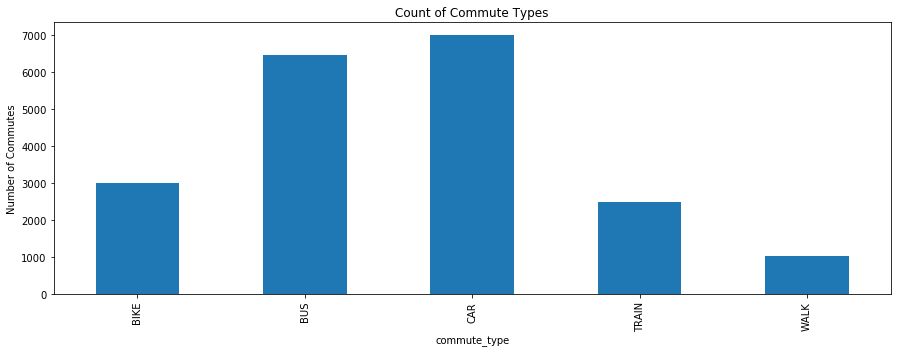

In [19]:
plt.figure(figsize=(15,5))
train_data_raw.groupby('commute_type').size().plot(kind='bar')
plt.title('Count of Commute Types')
plt.ylabel('Number of Commutes');

### What can you say about the data based on these graphs?

In [26]:
# The current dtype of time_of_day_ts is not great for graphing. It might be a good idea to do something about it. 
# This function converts this into a decimal between zero and twenty-four.

def timestamp_to_decimal(ts):
    """Convert a timestamp datum into a decimal between zero and twenty-four.
    
    Parameters
    ----------
    ts: pd.Series of datetime.
    """
    return ts.dt.hour + (1/60)*ts.dt.minute

In [33]:
# Let's use our new function on the data and create a new column. Notice that the function is being used to transform 
# both the training AND testing datasets.
train_data_raw['time_of_day'] = timestamp_to_decimal(
    train_data_raw['time_of_day_ts'])
test_data_raw['time_of_day'] = timestamp_to_decimal(
    test_data_raw['time_of_day_ts'])

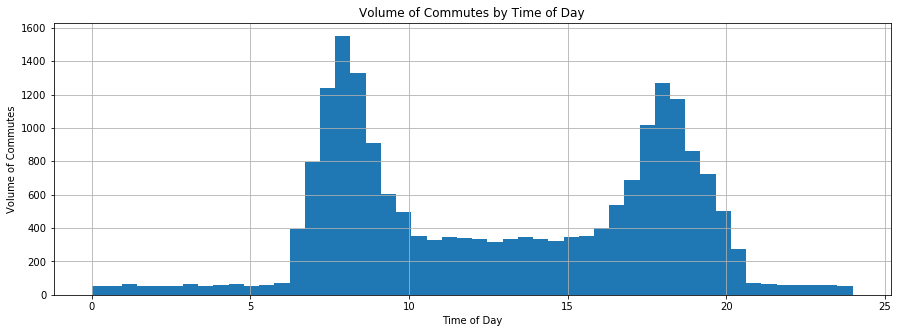

In [34]:
# Now that time of day is represented by a number from 0 to 24, let's see how many trips are being made throughout 
# the day.
plt.figure(figsize=(15,5))
train_data_raw['time_of_day'].hist(bins=50)
plt.title('Volume of Commutes by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Volume of Commutes');

### We have visualized the variables included in the dataset. Sometimes variables need to be transformed before they can be graphed in a meaningful way. We've looked at locations, commute types, commute times, time of day. The dataset contains information we can use to generate new features. Let's revisit location data because with a source and a destination, we can calculate distance.



![dist_image](https://slideplayer.com/slide/4829376/15/images/8/Some+Euclidean+Distances.jpg "Euclidean")

In [35]:
# Euclidean distance is also known as L2.
def euclidean_distance(source_x, source_y, target_x, target_y):
    return np.sqrt((source_x - target_x)**2 + (source_y - target_y)**2)

# Manhattan (or taxicab) distance is also known as L1.
def manhattan_distance(source_x, source_y, target_x, target_y):
    return np.abs(source_x - target_x) + np.abs(source_y - target_y)

In [36]:
train_data_raw['euclidean_distance'] = euclidean_distance(
    train_data_raw['source_latitude'], train_data_raw['source_longitude'],
    train_data_raw['destination_latitude'], train_data_raw['destination_longitude'])
test_data_raw['euclidean_distance'] = euclidean_distance(
    test_data_raw['source_latitude'], test_data_raw['source_longitude'],
    test_data_raw['destination_latitude'], test_data_raw['destination_longitude'])

train_data_raw['manhattan_distance'] = manhattan_distance(
    train_data_raw['source_latitude'], train_data_raw['source_longitude'],
    train_data_raw['destination_latitude'], train_data_raw['destination_longitude'])
test_data_raw['manhattan_distance'] = manhattan_distance(
    test_data_raw['source_latitude'], test_data_raw['source_longitude'],
    test_data_raw['destination_latitude'], test_data_raw['destination_longitude'])

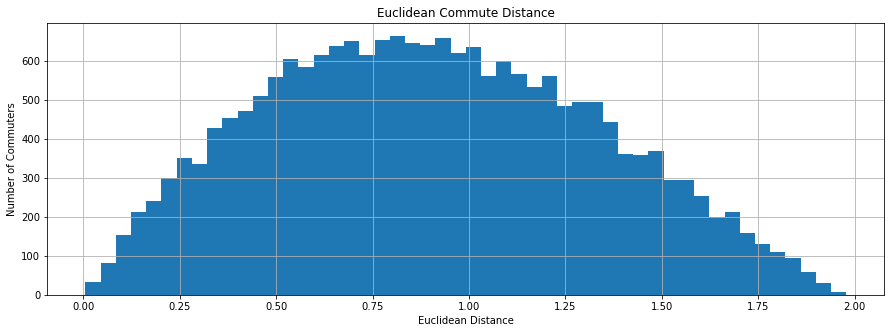

In [37]:
plt.figure(figsize=(15,5))
train_data_raw['euclidean_distance'].hist(bins=50)
plt.title('Euclidean Commute Distance')
plt.xlabel('Euclidean Distance')
plt.ylabel('Number of Commuters');

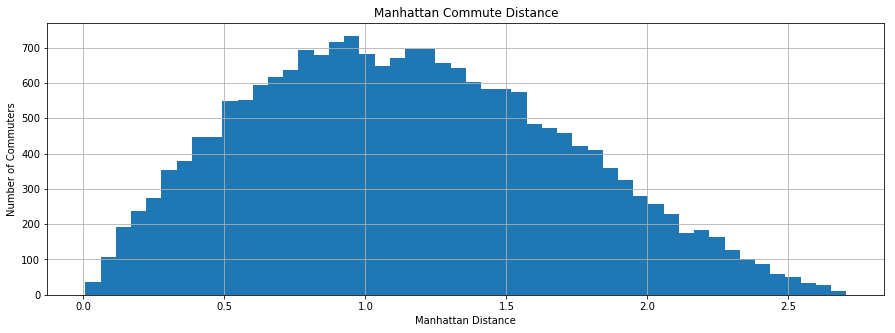

In [38]:
plt.figure(figsize=(15,5))
train_data_raw['manhattan_distance'].hist(bins=50)
plt.title('Manhattan Commute Distance')
plt.xlabel('Manhattan Distance')
plt.ylabel('Number of Commuters');

#### Now that we have some information about distance, do you have a guess for which type is related to commute time? 

## MOAR features
### At this point, we have done some feature engineering with numerical (continuous) data. What do you do with categorical data?

In [40]:
# The computer can't make sense of 'BIKE', 'CAR', etc, but it does understand 0 and 1 and combinations of those digits.
# Each of these combinations can be referred to as a level of a particular feature.
# Why does it make sense to leave one (level) out? By process of elimination, if a datapoint isn't one of the 
# n-1 levels, it must be the nth.

def create_indicator_features(feature, leave_one_out=True):
    # Sort the levels so we always get the same ordering of new features.
    levels = list(sorted(np.unique(feature)))
    # If we need to leave one out to avoid identifiability issues, we will 
    # leave out the *last* level, in sorted order.
    if leave_one_out:
        levels = levels[:-1]
    indicator_features = []
    for level in levels:
        indicator_feature = (feature == level)
        indicator_feature_name = "is_{0}".format(level)
        indicator_features.append(
            pd.Series(indicator_feature, 
                      name=indicator_feature_name, 
                      index=feature.index,
                      dtype=int))
    return pd.concat(indicator_features, axis=1)

In [41]:
commute_type_features_train = create_indicator_features(train_data_raw['commute_type'])
commute_type_features_test = create_indicator_features(test_data_raw['commute_type'])

commute_type_features_train.head()

,is_BIKE,is_BUS,is_CAR,is_TRAIN
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,0,0,0,1


In [42]:
train_data_processed = pd.concat([train_data_raw, commute_type_features_train], axis=1)
test_data_processed = pd.concat([test_data_raw, commute_type_features_test], axis=1)

In [44]:
train_data_processed.to_csv('../data')
test_data_processed.to_csv('../data')

IsADirectoryError: [Errno 21] Is a directory: '../data'

In [ ]:
# How to add to current data frame in the correct orientation? Know your axes.
data_df = pd.concat([data_df, pd.get_dummies(data_df['commute_type'])], axis=1)
# indicator variables instead of get_dummies. RQ of Matt for variable conventions:
# data_df['is_BIKE'] = data['commute_type'] == 'BIKE'